# 4.19.x Final Assignment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

import statsmodels.api as sm

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [2]:
food = pd.read_excel('data/food_consumption.xlsx')
food.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


In [3]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [4]:
food.groupby(food['food_category'])['consumption'].describe()

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
lamb_goat,130.0,2.600154,3.665252,0.00,0.5600,1.325,3.1025,21.12
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73


In [5]:
#Calcolo la mediana per ogni categoria di cibo e le ordino in maniera decrescente;
#La categoria LATTICINI ("Dairy") è quella con il valore di mediana più alto
food_median = food.groupby('food_category')['consumption'].median().sort_values(ascending=False)
food_median

food_category
dairy        110.975
wheat         69.420
poultry       19.855
fish          13.950
rice          11.875
pork          10.355
eggs           8.420
beef           8.285
nuts           3.495
lamb_goat      1.325
soybeans       0.075
Name: consumption, dtype: float64

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<AxesSubplot:xlabel='co2_emission', ylabel='food_category'>

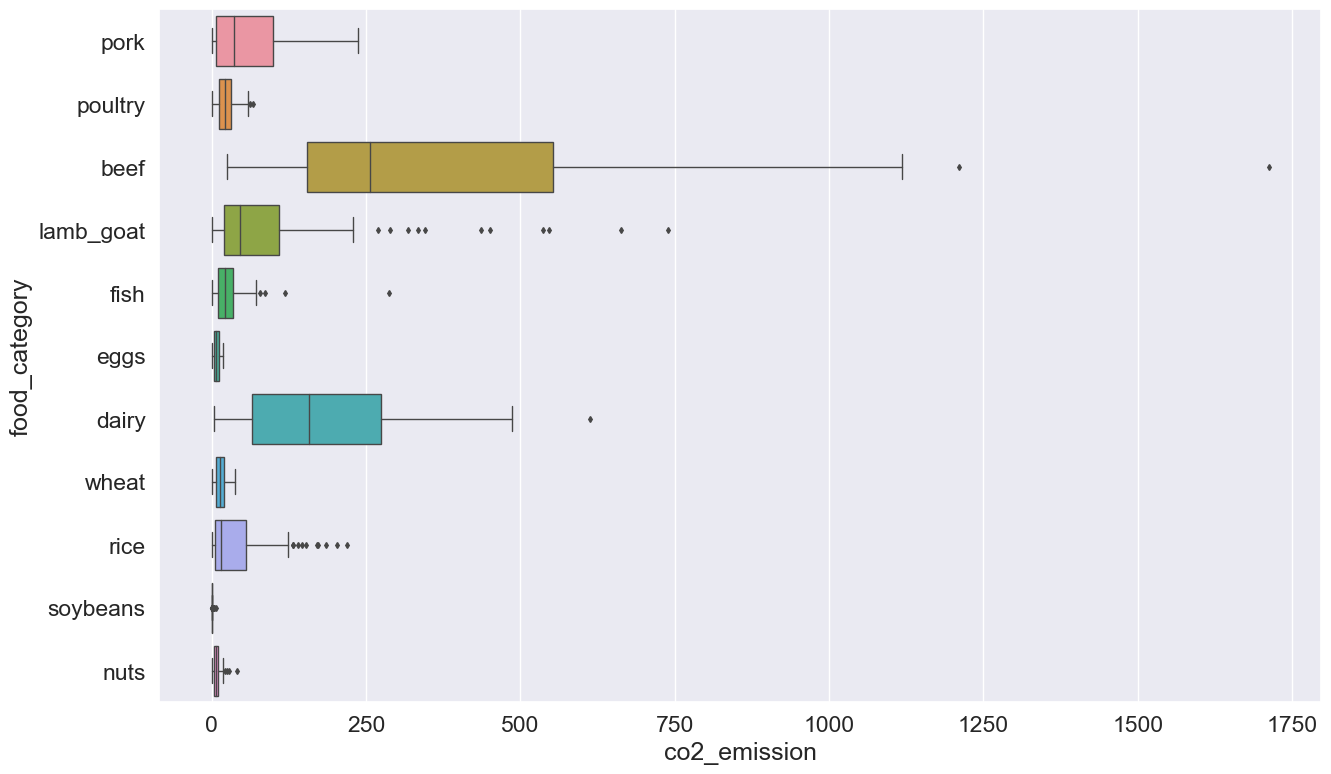

In [6]:
sns.boxplot(data=food, y='food_category', x='co2_emission', fliersize=3, linewidth=1)
#Guardando il grafico la categoria di cibo che ha il più alto scarto interquartile è BEEF

In [8]:
np.percentile(food.loc[food['food_category']=='beef', 'co2_emission'], [75, 25]) 

array([553.5925, 154.215 ])

In [9]:
food.loc[food['food_category']=='beef', 'co2_emission'].quantile(0.25)

154.215

In [10]:
food['food_category']

0            pork
1         poultry
2            beef
3       lamb_goat
4            fish
          ...    
1425        dairy
1426        wheat
1427         rice
1428     soybeans
1429         nuts
Name: food_category, Length: 1430, dtype: object

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

In [11]:
food_median_co2 = food.groupby('food_category')['co2_emission'].median().sort_values(ascending=False)
food_median_co2

food_category
beef         255.655
dairy        158.075
lamb_goat     46.405
pork          36.650
fish          22.270
poultry       21.325
rice          15.200
wheat         13.240
eggs           7.735
nuts           6.185
soybeans       0.035
Name: co2_emission, dtype: float64

In [12]:
#BEEF
max_category = food_median_co2.idxmax()
print("La food_category con il valore mediano più alto di CO2 è:", max_category)

La food_category con il valore mediano più alto di CO2 è: beef


4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

In [13]:
#trasformo in lista le due variabili poultry e fish
treatment = (food[food['food_category']=='poultry']['consumption']).tolist()
control = (food[food['food_category']=='fish']['consumption']).tolist()

#calcolo la differenza tra le medie:
mu_treatment = np.mean(treatment)
mu_control = np.mean(control)
mu_diff = mu_treatment - mu_control
print(mu_diff)

3.9321538461538488


In [14]:
#ora inserisco i risultati in un dataframe df e inizio a generare le permutazioni senza sostituzione
df = pd.DataFrame({'group':['treatment' if el <= len(treatment) else 'control' for el in range(1,(len(treatment)*2)+1)],
                   'responses': treatment + control})
df.sample(5)

,group,responses
185,control,6.07
181,control,2.18
225,control,7.57
124,treatment,1.84
230,control,2.17


In [15]:
#Ora campiono la distribuzione delle differenze in media:
n = 20000
mu_diff_samples = []
for i in range(n):
    #estraggo un sottocampione del 50% dei dati senza sostituzione: 
    df_sample1 = df.sample(frac=0.5, replace=False)
    #ora recupero gli indice delle riche che non sono stati estratti dal df nel passaggio precedente con la funzione set:
    ix2 = set(df.index) - set(df_sample1.index)
    #Ora creo un dataframe con il restante 50% dei dati:
    df_sample2 = df.iloc[list(ix2)]
    #Ora calcolo la differenza in media per ogni campione:
    mu_diff_temp = np.mean(df_sample1['responses']) - np.mean(df_sample2['responses'])
    #Ora aggiungo l'elenco della differenza della media campionata alla lista della media dei campioni
    mu_diff_samples.append(mu_diff_temp)

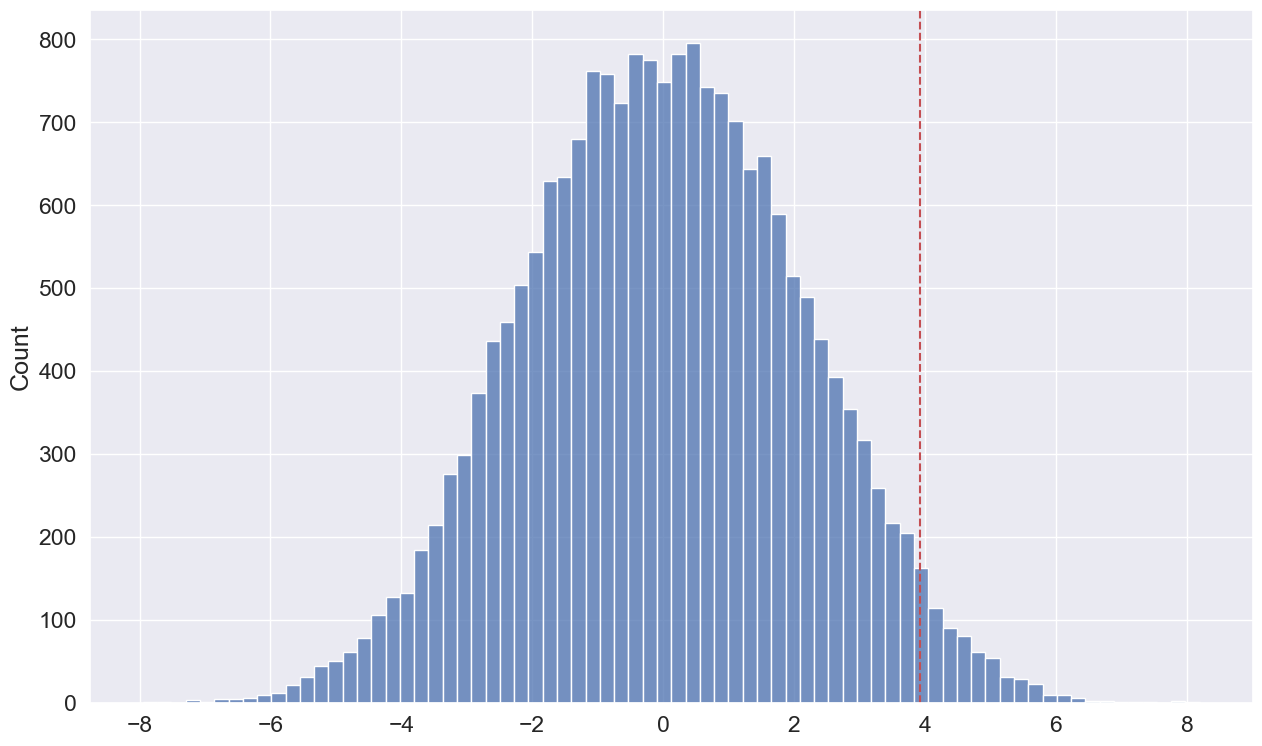

mu_diff: 3.93


In [16]:
#Rappresento istograficamente i risultati ottenuti e dopo andrò a calcolare il p-value per rispondere alla domanda
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
print('mu_diff:', round(mu_diff, 2))

In [17]:
#Procedo al calcolo del p_value, ovvero alla prbabilità di ottenere risultati del test estremi
#almeno quanto il risultato effettivamente osservato, nell'ipotesi che l'Hp nulla sia corretta
#Per prima cosa conto quante volte i risultati del test erano >= rispetto al risultato effettivo osservato:
sum(mu_diff_samples>mu_diff)

594

In [18]:
#Divido questo risultato per il numero totale di campioni per trovare il p_value:
p_value = sum(mu_diff_samples>mu_diff)/n
print('p_value:' , p_value)

p_value: 0.0297


In [19]:
#Ora confrontiamo il valore del p_value ottenuto con il nostro livello di significatività (𝛼) supponendolo pari a 0.5%
#se p_value>𝛼: accettiamo l'HP nulla H0 per cui il risultato che abbiamo osservato non è differente dal risultato casuale;
#se p_value<=𝛼: rigettiamo l'HP nulla H0 e diciamo che il risultato osservato (la differenza nelle medie dei due gruppi osservati) è statisticamente significativo;

alpha = 0.05
if p_value <= alpha: 
    print('p-value <= alpha | il risultato osservato e statisticamente significativo e rifiuto lHp nulla, H0')
else: 
    print('p-value > alpha | il risultato osservato non è statisticamente significativo e accetto lHp nulla, H0')

'''
Questo mi fa pensare che la differenza nei consumi di pollo e pesce è una differenza significativa 
e che questa differenza non sia dovuta al caso quanto invece a determinate scelte da parte dei vari 
Paesi considerati
'''
    

p-value <= alpha | il risultato osservato e statisticamente significativo e rifiuto lHp nulla, H0


'\nQuesto mi fa pensare che la differenza nei consumi di pollo e pesce è una differenza significativa \ne che questa differenza non sia dovuta al caso quanto invece a determinate scelte da parte dei vari \nPaesi considerati\n'

### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [20]:
happy = pd.read_excel('data/world_happiness.xlsx')
happy.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

<AxesSubplot:xlabel='happiness_score', ylabel='Count'>

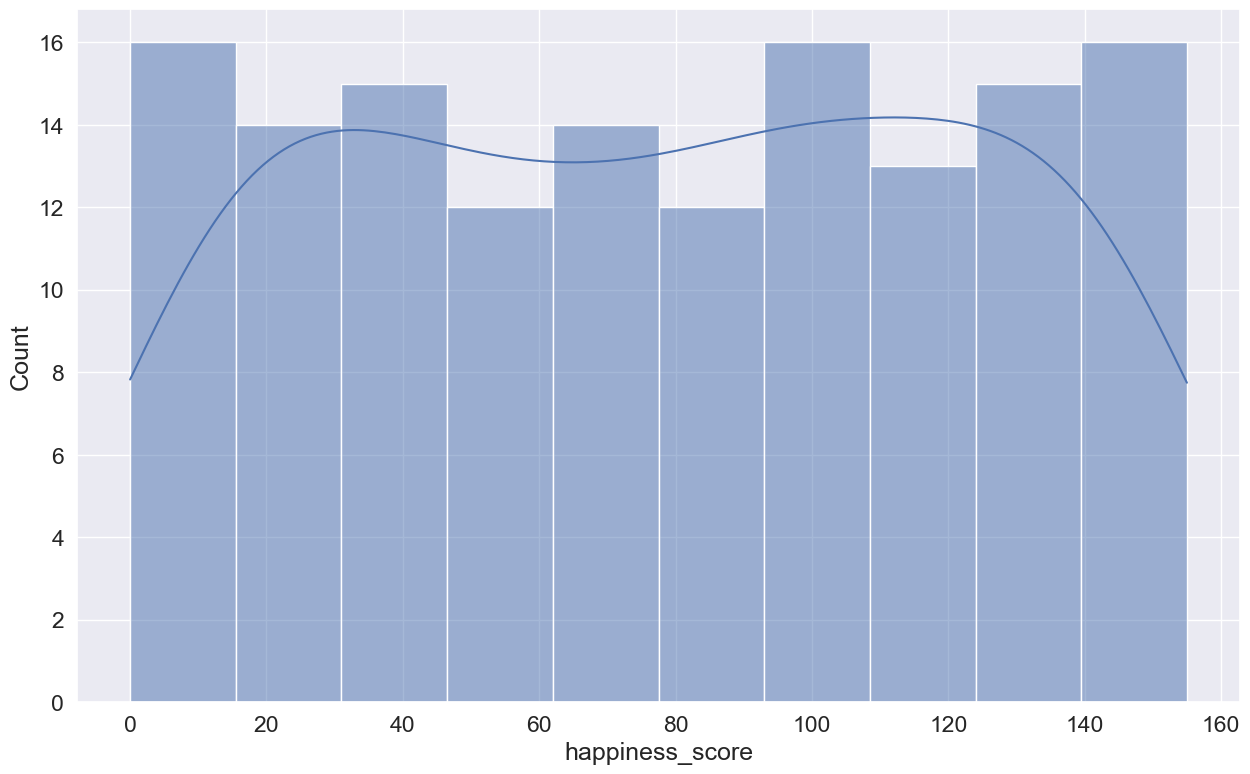

In [21]:
sns.histplot(x ='happiness_score', data=happy, bins = 10, kde = True)

In [22]:
#Analizzando il dataframe happy nella colonna happiness_score, si può inizialmente vedere che 
#la distribuzione sarà abbastanza uniforme avendo 143 righe con valori di min e max che vanno da 0 a 155
# Dall'istogramma prodotto si può confermare tale teoria confermando che la distribuzione è UNIFORME

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

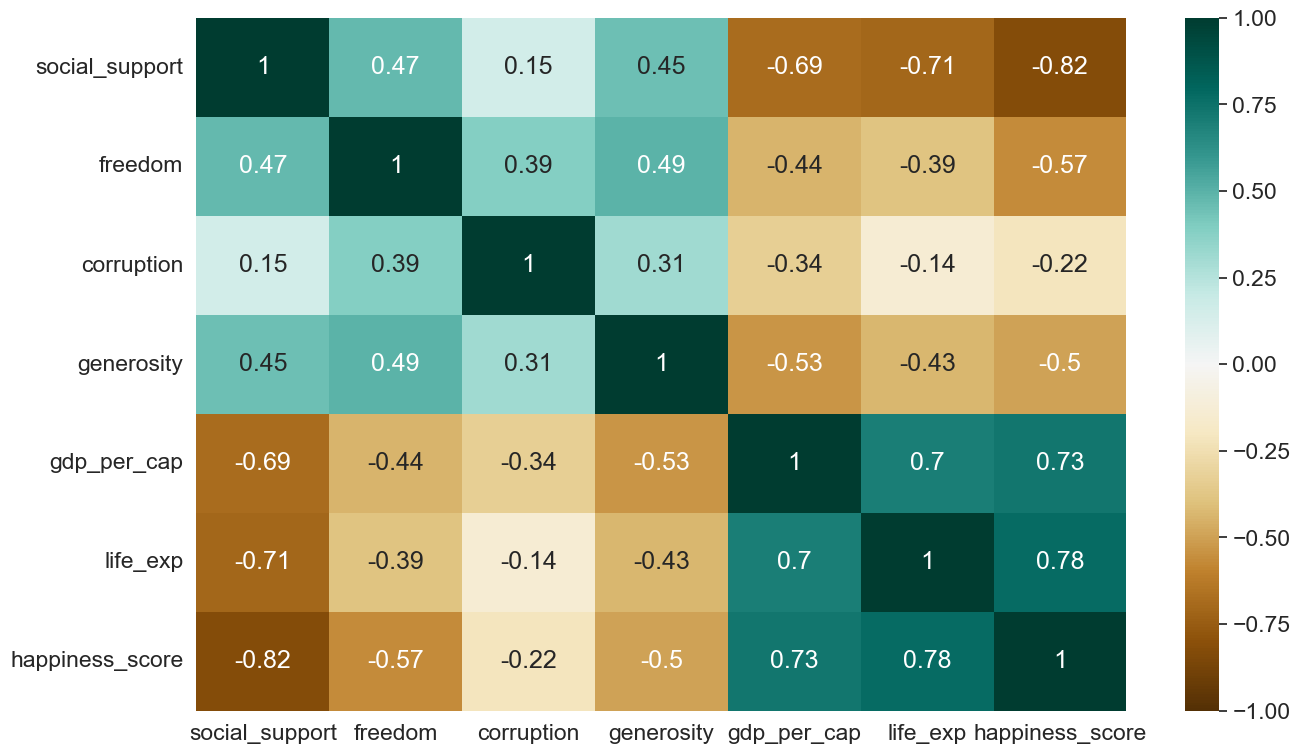

In [23]:
sns.heatmap(happy.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

In [24]:
#La variabile che presenta il minor grado di correlazione con la variabile happiness_score è CORRUPTION;
happy_corr = (happy[['country', 'corruption', 'happiness_score']]).sort_values('corruption', ascending=False)
happy_corr.head(5)

,country,corruption,happiness_score
66,Moldova,148.0,85
88,Bulgaria,147.0,59
44,Romania,146.0,108
119,Ukraine,143.0,23
36,Trinidad and Tobago,141.0,117


7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [25]:
#conto quanti valori mancanti trovo nella colonna CORRUPTION --> 8 Paesi hanno valore mancante per CORRUPTION
happy[pd.isna(happy.corruption)]
#avrei potuto anche fare cosi per la sola lista dei Paesi con valori mancanti per corruption senza tutto il dataframe:
# happy.country[happy['corruption'].isna()]

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
20,United Arab Emirates,72.0,4.0,NaN,15.0,65700,73.6,135
26,Saudi Arabia,62.0,68.0,NaN,82.0,48100,77.1,128
27,Qatar,NaN,NaN,NaN,NaN,113000,80.5,127
35,Bahrain,59.0,24.0,NaN,23.0,42000,79.8,119
47,Kuwait,69.0,47.0,NaN,42.0,64100,83.3,105
78,Turkmenistan,8.0,83.0,NaN,33.0,17600,70.3,69
84,China,108.0,31.0,NaN,133.0,17100,77.5,63
91,Jordan,88.0,88.0,NaN,118.0,8350,79.6,55


In [26]:
#sostituosco il dataframe happy con happy.copy in cui sostituisco i valori mancanti delle colonne 
#con il valore della media della relativa colonna:
happy.fillna(happy.mean(), inplace=True)
print(happy.iloc[84]) #stampando, come esempio, questa riga posso vedere che il valore prima mancante nella colonna corruption è stato ora sostituito con la media della colonna

country                China
social_support         108.0
freedom                 31.0
corruption         73.244444
generosity             133.0
gdp_per_cap            17100
life_exp                77.5
happiness_score           63
Name: 84, dtype: object


/var/folders/41/9bjdy0r92q163gk9y11wf5mw0000gn/T/ipykernel_1537/867920739.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  happy.fillna(happy.mean(), inplace=True)


8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

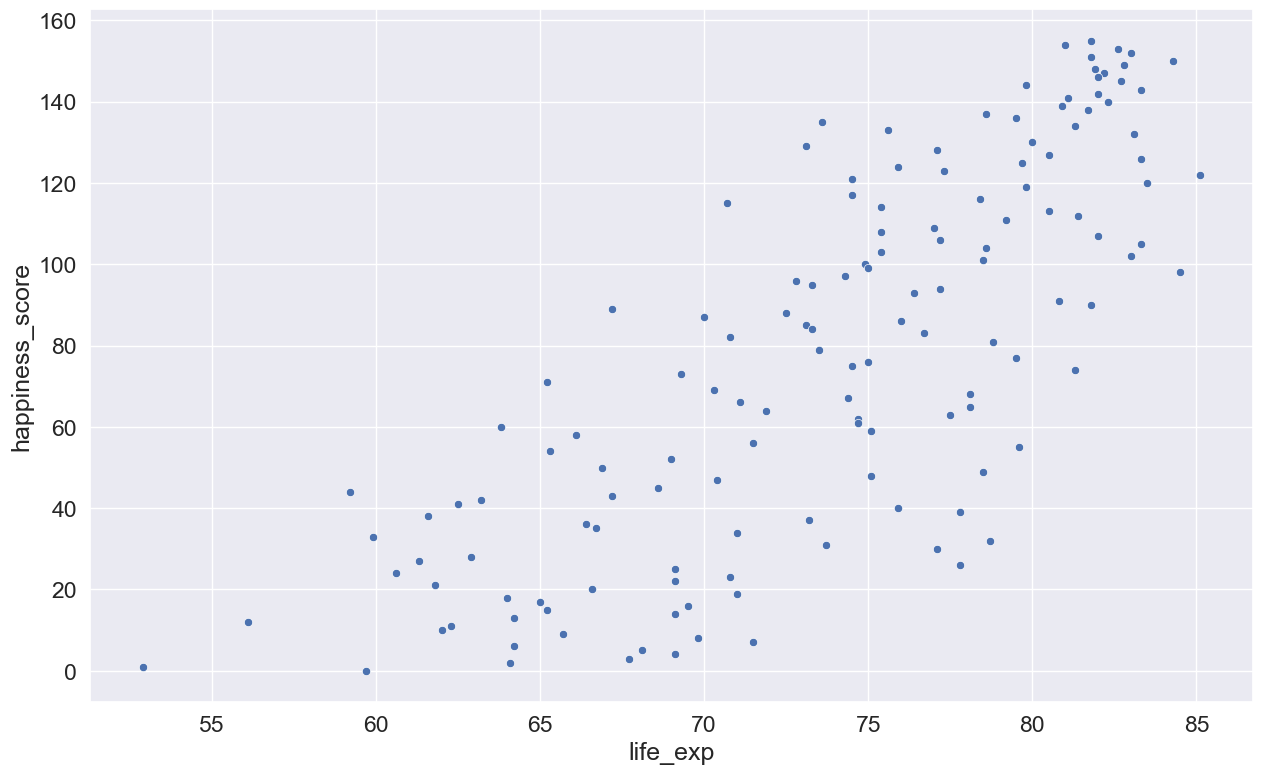

In [27]:
#faccio uno scatterpolot per avere un'idea iniziale di come sono correlate le due variabili
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)
plt.show()
#vedo che sono positivamente correlate perchè all'aumentare dell'aspettativa di vita aumenta anche il grado di felicità

In [28]:
#ma per essere sicuro di quanto illustrato precedentemente, 
#vado a calcolare il coefficiente di correlazione tra le due variabili
correl = happy.happiness_score.corr(happy.life_exp)
print('Correlation coefficient between X and Y:', round(correl, 2))
#Dal risultato ottenuto noto infatti che il coefficiente di correlazione è vicino al valore 1 e come avevamo 
#ipotizzato dal grafico possiamo dire che le due variabili sono fortemente correlate, ovvero che all'aumentare
#dell'una aumenta anche l'altra

Correlation coefficient between X and Y: 0.78


In [29]:
#TUTTO QUANTO CALCOLATO FINORA HO VOLUTO DIMOSTRARLO PERCHE' SONO INTERESSATO A VEDERE COME CAMBIA IL 
#GRADO DI FELICITA' SE AUMENTO DI UN ANNO L'ASPETTATIVA DI VITA..PER OSSERVRE QUESTA HP FACCIO CREO UN MODELLO 
#DI REGRESSIONE LINEARE
happy.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [30]:
#Applico il modello di regressione lineare alle variabili life_exp e happiness_score
import statsmodels.api as sm
Y = happy['happiness_score']
X = happy['life_exp']
X = sm.add_constant(data=X)   # add a constant to the model
model = sm.OLS(endog=Y,exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           1.59e-30
Time:                        17:08:30   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
results.summary().tables[1]
#DA QUESTO RISULTATO OTTENUTO POSSO RISPONDERE ALLA DOMANDA DI CUI SOPRA. INFATTI SI PU0' NOTARE CHE IL 
#COEFFICIENTE DI life_exp E' PARI A 5.1021 ED ESSENDO CORRISPONDENTE AL COEFFICIENTE b1 DELLA NOSTRA VIARIABILE
# X ALL'INTERNO DELL'EQUAZIONE DELLA RETTA DI REGRESSIONE Y = b0 + b1X, POSSIAMO DIRE CHE ALL'AUMENTARE DELLA 
#VARIABILE X (IN QUESTO CASO life_exp), UTILIZZATA COME VARIABILE NEL NOSTRO MODELLO DI REGRESSIONE, DI UNA 
#UNITA', LA NOSTRA VARIABILE Y (happiness_score) AUMENTERA' DI 5.1021 PUNTI.
#DALLA TABELLA DI CUI SOPRA POSSIAMO ANCHE VEDERE CHE IL P_VALUE E' PARI A 0 E QUINDI POSSIAMO RIFIUTARE L'HP0 NULLA
# E AFFERMARE CHE IL NOSTRO TEST E STATISTICAMENTE SIGNIFICATIVO

#VISTO L'INTERVALLO DI CONFIDENZA MOLTO STRETTO (TRA 4.421 E 5.783) ENTRO CUI SI ATTESTA LA NOSTRA STIMA,
#POSSIAMO INOLTRE DIRE CHE LA NOSTRA STIMA E' CONFIDENT, ATTENDIBILE

,coef,std err,t,P>|t|,[0.025,0.975]
const,-298.8710,25.536,-11.704,0.000,-349.355,-248.387
life_exp,5.1021,0.344,14.812,0.000,4.421,5.783


In [32]:
np.array([1,90])

array([ 1, 90])

In [33]:
results.predict(np.array([1,88]))
#Applicando questa funzione di previsione al modello creato precedentemente possiamo vedere esattamente come cambia
#il grado di felicità HAPPINESS_SCORE al variare di 1 unità di LIFE_EXP; avevamo detto che dai coefficienti ottenuti 
#risultava che al variare di 1 unità di LIFE_EXP, HAPPINESS_SCORE aumentava di 5,1021 punti. Da questa funzione
#predict possiamo andare a verificare quanto detto osservando, ad esempio, l'HAPPINESS_SCORE nel caso di un'aspettativa 
#di vita di 88 anni e nel caso di 89 anni. La differenza tra i due risultati di HAPPINESS_SCORE ottenuti è esattamente
#5.1021

array([150.11048395])

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

In [34]:
happy.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [35]:
happy.fillna(0, inplace=True)
happy.shape

(143, 8)

In [36]:
#Dopo aver pulito il dataframe dai valori NaN nei passaggi precedenti, vado a calcolare il grado di correlazione
#tra la variabile dipendente Y e tutti i potenziali predittori numerici (che andranno poi a predire la mia variabile
#happiness_score)
happy[['happiness_score', 'social_support', 'freedom', 'generosity', 'life_exp']].corr()

,happiness_score,social_support,freedom,generosity,life_exp
happiness_score,1.000000,-0.821384,-0.565298,-0.497250,0.780225
social_support,-0.821384,1.000000,0.470893,0.449225,-0.703274
freedom,-0.565298,0.470893,1.000000,0.493207,-0.387622
generosity,-0.497250,0.449225,0.493207,1.000000,-0.431770
life_exp,0.780225,-0.703274,-0.387622,-0.431770,1.000000


In [37]:
Y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(data=X)  
model_mr = sm.OLS(endog=Y,exog=X)
results_mr = model_mr.fit()
results_mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           1.57e-45
Time:                        17:08:30   Log-Likelihood:                -640.01
No. Observations:                 143   AIC:                             1290.
Df Residuals:                     138   BIC:                             1305.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -47.3226     30.849     -1.534      0.127    -108.320      13.675
social_support    -0.4621      0.059     -7.799      0.000      -0.579      -0.345
freedom           -0.1918      0.049     -3.950      0.000      -0.288      -0.096
generosity        -0.0422      0.049     -0.855      0.394      -0.140       0.055
life_exp           2.4228      0.366      6.612      0.000       1.698       3.147
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.573
Skew:                          -0.137   Prob(JB):                        0.751
Kurtosis:                       3.147   Cond. No.                     2.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [39]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary().tables[0]

Dep. Variable:,happiness_score,R-squared:,0.785
Model:,OLS,Adj. R-squared:,0.775
Method:,Least Squares,F-statistic:,82.10
Date:,"Sun, 19 Feb 2023",Prob (F-statistic):,3.39e-29
Time:,17:08:31,Log-Likelihood:,-426.46
No. Observations:,95,AIC:,862.9
Df Residuals:,90,BIC:,875.7
Df Model:,4,,
Covariance Type:,nonrobust,,


In [40]:
pred_test = results.predict(X_test)
ssr_test = np.sum((y_test - pred_test)**2)
sst_test = np.sum((y_test - np.mean(y_test))**2)
rsq_test = 1 - (ssr_test/sst_test)
print("R-squared of test set:", rsq_test)

R-squared of test set: 0.7772372395041663


In [41]:
pred_train = results.predict(X_train)
ssr_train = np.sum((y_train - pred_train)**2)
sst_train = np.sum((y_train - np.mean(y_train))**2)
rsq_train = 1 - (ssr_train/sst_train)
print("R-squared of train set:", rsq_train)

R-squared of train set: 0.784887383901449


In [52]:
X_test.head()

,const,social_support,freedom,generosity,life_exp
117,1.0,96.0,29.0,1.0,69.1
19,1.0,24.0,58.0,117.0,79.5
82,1.0,89.0,136.0,63.0,78.1
97,1.0,109.0,2.0,61.0,70.4
56,1.0,19.0,80.0,57.0,72.8


In [45]:
#Dopo aver creato il modello splittando gli i dati in maniera casuale in 67% training e 33% test, vado a 
#calcolare il MAE, ovvero l'errore assoluto medio, per verificare il grado di accuratezza dei miei modelli.
#Definisco una funzione per il calcolo del MAE che applicherò poi separatamente ai dataset di train e test
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [46]:
print('Naïve Training MAE:', mae(y_train, np.mean(y_train))) #naive mae
print('Training MAE:', mae(y_train, pred_train)) # mae

Naïve Training MAE: 40.38
Training MAE: 47.47


In [47]:
#Il fatto che il training MAE sia inferiore al Naive Training MAE è positivo perchè significa che il mio modello
#sta prevedendo meglio della media degli errori sulla base del valore preso come riferimento, quindi i miei dati 
#si avvicinano di più al modello

In [48]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 39.94
Testing MAE: 17.54


In [49]:
#Il fatto che il MAE della parte die Testing (il 33%) sia più basso del MAE della parte di Training (67%)
#è un valore accettabile perchè è normale che il modello sia più accurato a prevedere i dati sul modello 
#su cui è stato addestrato.

In [50]:
#Il fatto che i MAE della % di Testing e Training siano due valori vicini tra loro e comunque come valore di scarto
#di errore accettabile in termini di happiness_score (perchè può essere che il mio risultato si allontani più o meno 
#di circa 17 punti dal mio modello, altrimeni si genererebbe un problema di overfitting, ovvero di troppa precisione
#dei dati rispetto al modello) ci dice, in questo caso, che non vi è un problema di overfitting. 
#Il modello, quindi, in fase di Training ha imparato il modello ed è riuscito a replicarlo e ad adattarsi anche per 
#la parte di dati sconosciuta in fase di Testing

10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [53]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 39.94
Testing MAE: 17.54


In [54]:
# Testing MAE = 17.18

#Il fatto che il Testing MAE sia simile al Training MAE e che sia anche ampiamente più basso del 
#Naive Testing MAE, preso come valore di riferimento e poco attendibile perchè basato sul modello predittivo della 
#media semplice, mi dice che il modello creato è POSITIVO e che non ha imparato le risposte dal modello del Training
#per poi replicare le risposte tali e quali nella fase di Testing, perchè altrimenti il mio errore sarebbe molto più
#discordante da quello di Training. Invece, quello che è successo è che il modello ha imparato a funzionare adattandosi
#ai dati non nella specifica situazione del training test ma pronto ad adattarsi alla valutazione di nuovi dati come
#nella fase di Testing.

#Questo risultato, come indicato nella risposta alla domanda precedente, n. 9, indica che non vi è in questo caso 
#un problema di overfitting. 

#Se posso esprimere un parere personale, è vero che il valore di happiness_score può accettare un errore di circa 17 
#punti dal valore del modello ideale, ma secondo me siamo un pò al limite dell'accettabilità di questo errore. 
#Nel nostro caso, di happiness_score, se fosse ancora un pò più alto direi che comincerebbe a presentarsu un problema 
#di accuratezza del modello.

#Sono soddisfatto del risultato ottenuto dal modello

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

In [55]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,1.3763,38.767,0.036,0.972,-75.642,78.395
social_support,-0.5119,0.073,-7.025,0.000,-0.657,-0.367
freedom,-0.1786,0.060,-2.966,0.004,-0.298,-0.059
generosity,-0.0518,0.061,-0.847,0.399,-0.173,0.070
life_exp,1.8109,0.459,3.942,0.000,0.898,2.724


In [56]:
#Analizzando i coefficienti di regressione del modello soprastante noto che il coefficiente di life_exp è molto
#più alto rispetto al valore degli altri coefficienti. Avendo un valore di p_value inferiore a 0,05, il risultato 
#risulta essere statisticamente significativo. Il fatto che il coefficiente sia cosi alto mi indica che la variabile
#LIFE_EXP, in fase di input, ha un impatto molto più ampio sulle variabili di output. Quindi le variabili di 
#output sono decisamente più sensibili ad una variazione della variabile di input.

#### in più si poteva notare come quasi tutte le variabili (regressori) sono correlate negativamente con la variabile *life_exp* il che sarebbe un po' contro intuitivo. Questo potrebbe far pensare che ci possano essere problemi intrinsechi nei dati

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

Importing plotly failed. Interactive plots will not work.
17:12:15 - cmdstanpy - INFO - Chain [1] start processing
17:12:15 - cmdstanpy - INFO - Chain [1] done processing


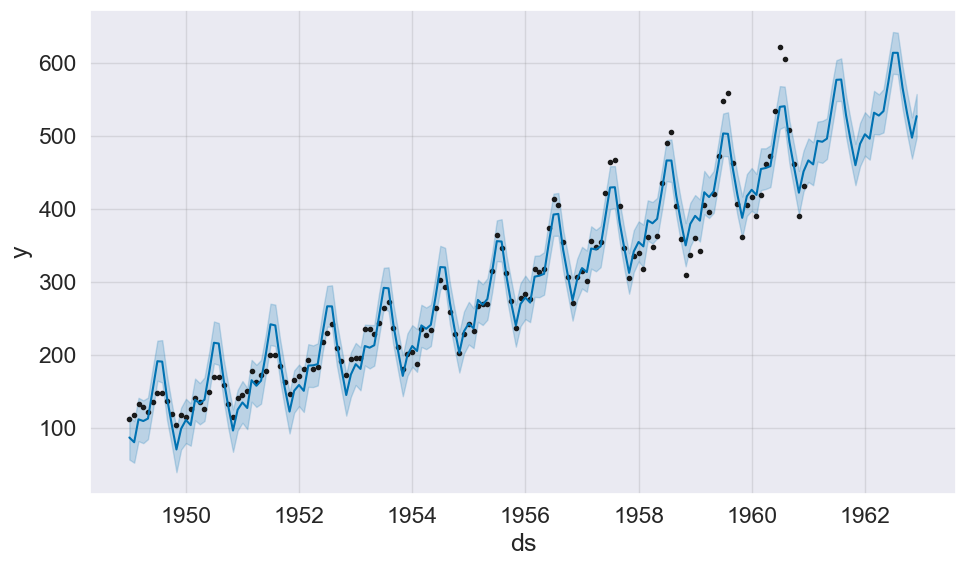

In [57]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_excel('data/air-passengers.xlsx')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

In [58]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


#### per risolvere questo punto avresti potuto inserire nella definizione della classe *prophet()* il parametro *seasonality_mode* più o meno come fatto qui in basso

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)